<a href="https://colab.research.google.com/github/Jay-Wolff/Image-Processing/blob/main/Image_Processing_Janissa_Abreu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing


a. Load the image below as a PyTorch tensor without reshaping:

<img src="https://webpages.tuni.fi/foi/SA-DCT/Present_2006/DET_NOISY_Z_____Lena_______025__PSNR_20_1765dB.png" height="300">

URL of the image: https://webpages.tuni.fi/foi/SA-DCT/Present_2006/DET_NOISY_Z_____Lena_______025__PSNR_20_1765dB.png

In [ ]:
import torch
import torch.nn as nn

In [ ]:
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([transforms.ToTensor()])

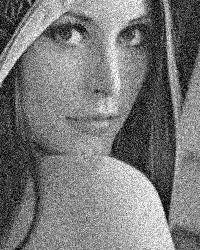

In [ ]:
import urllib
url, filename = ("https://webpages.tuni.fi/foi/SA-DCT/Present_2006/DET_NOISY_Z_____Lena_______025__PSNR_20_1765dB.png", "img.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
img = Image.open("img.jpg")
img

b. Display the shape of the image tensor.

torch.Size([1, 250, 200])


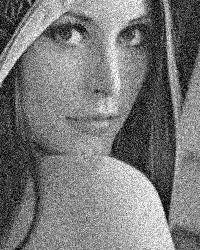

In [ ]:
img_processed = preprocess(img)
print(img_processed.shape)
to_image = transforms.ToPILImage()
to_image(img_processed)

c. The core idea of Gaussian smoothing is to replace each pixel's value with the weighted average of its surrounding pixel values. More precisely, the following formula is used to calculate the new value for each pixel:

new value = 0.25 * original value + 0.125 * (above + below + left + right) + 0.0625 * (northeast + northwest + southeast + southwest)

This formula assigns varying weights to the pixel's original value and its neighbors, with the central pixel receiving the highest weight. The distribution of these weights is visually represented below:

<img src="https://i.stack.imgur.com/YAEQR.png" height="200">

To achieve a smoothed image, apply this formula to calculate the new value for each pixel that is not on the edge of the image. Store the new values in a new tensor.


In [ ]:
answer = torch.zeros([1, 250, 200])

In [ ]:
originalvalue = ([1, 250, 200])

for i in range(1, 250 - 1): #references height (rows)
  for j in range(1, 200 - 1): #references width (columns)
    middle = img_processed[0, i, j]
    above = img_processed[0, i + 1, j]
    below = img_processed[0, i - 1, j]
    left = img_processed[0, i, j - 1]
    right = img_processed[0, i, j + 1]
    northeast = img_processed[0, i + 1, j + 1]
    northwest = img_processed[0, i + 1, j - 1]
    southeast = img_processed[0, i - 1, j + 1]
    southwest = img_processed[0, i - 1, j - 1]

    result = 0.25 * middle + 0.125 * (above + below + left + right) + 0.0625 * (northeast + northwest + southeast + southwest)
    answer[0, i, j] = result

d. Display the processed image. The denoised image should look like this:

<img src="https://raw.githubusercontent.com/ch00226855/temp/main/.ipynb_checkpoints/lena.png" height="300">

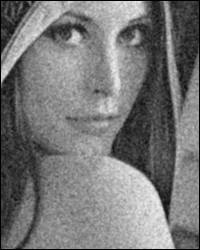

In [ ]:
to_image(answer)